### **Car Sales Data Analysis - Project 1**

#### Question 1: 
Analyzing Regional Patterns: Do certain regions have unique patterns for used car sales (e.g. certain makes being more common in certain regions, certain regions having higher/lower prices, what region offers the most bang for your buck vs the worst deals)?

Esteban Missura

In [92]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

In [2]:
car_df = pd.read_csv('final_clean_car_data.csv')
car_df.head()

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2015,kia,sorento,suv,automatic,ca,5.0,16639.0,white,black,20500,21500,2014
1,2015,kia,sorento,suv,automatic,ca,5.0,9393.0,white,beige,20800,21500,2014
2,2014,bmw,3 series,sedan,automatic,ca,4.5,1331.0,gray,black,31900,30000,2015
3,2015,volvo,s60,sedan,automatic,ca,4.1,14282.0,white,black,27500,27750,2015
4,2015,nissan,altima,sedan,automatic,ca,1.0,5554.0,gray,black,15350,10900,2014


In [3]:
car_df.loc[car_df['body'].str.contains('cab|supercrew'), 'body'] = 'pickup'
car_df.loc[car_df['body'].str.contains('van'), 'body'] = 'van'
car_df.loc[car_df['body'].str.contains('sedan'), 'body'] = 'sedan'
car_df.loc[car_df['body'].str.contains('coupe|koup'), 'body'] = 'coupe'
car_df.loc[car_df['body'].str.contains('convertible'), 'body'] = 'convertible'
car_df.loc[car_df['body'].str.contains('wagon'), 'body'] = 'wagon'
car_df['body'].value_counts()

body
sedan          211452
suv            112840
pickup          36308
van             25686
hatchback       23508
coupe           16537
wagon           14016
convertible      8637
Name: count, dtype: int64

In [5]:
car_df.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,448984.000000,448984.000000,448984.000000,448984.000000,448984.000000,448984.000000
mean,2010.264161,3.422718,64611.005377,13083.466616,12916.083293,2014.922293
std,3.700003,0.931266,45433.162194,7480.225566,7547.955768,0.267710
min,1990.000000,1.000000,1.000000,25.000000,1.000000,2014.000000
25%,2008.000000,2.700000,28790.000000,7600.000000,7300.000000,2015.000000
50%,2012.000000,3.600000,51551.500000,12200.000000,12100.000000,2015.000000
75%,2013.000000,4.200000,95135.250000,17700.000000,17600.000000,2015.000000
max,2015.000000,5.000000,199249.000000,110000.000000,34500.000000,2015.000000


In [60]:
car_df.groupby(['state', 'make']).count().sort_values(by='year', ascending=False)

year  model  body  transmission  condition  odometer  color  \
state make                                                                   
fl    ford     8919   8919  8919          8919       8919      8919   8919   
tx    ford     8150   8150  8150          8150       8150      8150   8150   
fl    toyota   7726   7726  7726          7726       7726      7726   7726   
ca    ford     7558   7558  7558          7558       7558      7558   7558   
fl    nissan   7312   7312  7312          7312       7312      7312   7312   
...             ...    ...   ...           ...        ...       ...    ...   
pr    porsche     1      1     1             1          1         1      1   
      saab        1      1     1             1          1         1      1   
co    smart       1      1     1             1          1         1      1   
fl    daewoo      1      1     1             1          1         1      1   
al    buick       1      1     1             1          1         1      1   

               interior   mmr  sellingprice  saledate  
state make                                             
fl    ford         8919  8919          8919      8919  
tx    ford         8150  8150          8150      8150  
fl    toyota       7726  7726          7726      7726  
ca    ford         7558  7558          7558      7558  
fl    nissan       7312  7312          7312      7312  
...                 ...   ...           ...       ...  
pr    porsche         1     1             1         1  
      saab            1     1             1         1  
co    smart           1     1             1         1  
fl    daewoo          1     1             1         1  
al    buick           1     1             1         1  

[1320 rows x 11 columns]

In [9]:
car_df['make'].value_counts()

make
ford             77908
chevrolet        51112
nissan           43473
toyota           33861
dodge            26646
honda            23588
hyundai          18463
kia              15715
chrysler         14959
bmw              14379
infiniti         13398
jeep             12336
mercedes-benz    12146
volkswagen       10673
lexus             9376
gmc               8427
mazda             6850
cadillac          5795
lincoln           4676
buick             4376
subaru            4297
acura             4204
audi              4049
pontiac           3870
mitsubishi        3565
ram               3410
volvo             2993
mini              2943
saturn            2480
scion             1530
mercury           1517
jaguar            1005
suzuki             965
hummer             747
land rover         726
fiat               725
porsche            517
saab               408
smart              343
oldsmobile         290
isuzu              163
maserati            50
plymouth            15
geo   

<Axes: xlabel='state'>

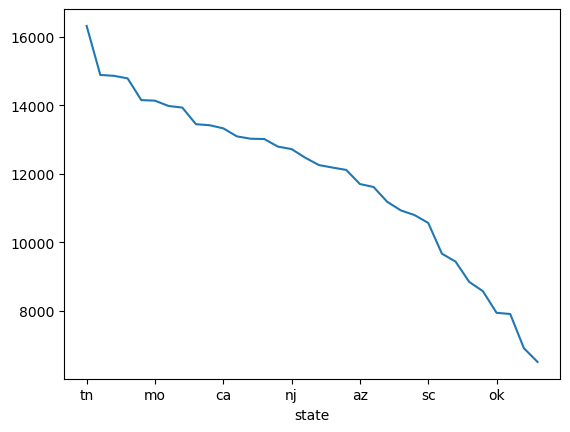

In [80]:
car_df.groupby('state')['sellingprice'].mean().sort_values(ascending=False).plot()

In [48]:
prices_df = car_df['sellingprice'].groupby([car_df['state']]).mean().reset_index()
prices_df['state'] = prices_df['state'].str.upper()
prices_df['sellingprice'] = prices_df['sellingprice'].round(2)
prices_df.head()

,state,sellingprice
0,AL,9440.00
1,AZ,11702.61
2,CA,13327.41
3,CO,14884.75
4,FL,13447.85


In [49]:
# Plotting the heatmap
fig = px.choropleth(prices_df, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='sellingprice', 
                    color_continuous_scale='Blues', 
                    scope='usa',
                    labels={'sellingprice':'Average Selling Price'},
                    title='Average Selling Prices by State',
                    hover_data={'sellingprice': ':.2f'})

# Update the hover template to show the formatted currency
fig.update_traces(hovertemplate='<b>%{location}</b><br>Average Selling Price: $%{z:,}')

fig.update_layout(coloraxis_colorbar=dict(
    title="Average Selling Price",
    tickformat="$.0f"))  # Format color bar

# Show the plot
fig.show()

In [50]:
year_df = car_df['year'].groupby([car_df['state']]).mean().reset_index()
year_df['state'] = year_df['state'].str.upper()
year_df['year'] = year_df['year'].round(0)
year_df.tail()

,state,year
29,TX,2010.0
30,UT,2009.0
31,VA,2008.0
32,WA,2010.0
33,WI,2010.0


In [51]:
# Plotting the heatmap
fig2 = px.choropleth(year_df, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='year', 
                    color_continuous_scale='Reds', 
                    scope='usa',
                    labels={'year':'Average Car Year'},
                    title='Average Car Year by State')

# Show the plot
fig2.show()

In [47]:
car_df[['sellingprice', 'year', 'condition', 'odometer', 'mmr']].corr().round(2)

,sellingprice,year,condition,odometer,mmr
sellingprice,1.00,0.64,0.57,-0.65,0.98
year,0.64,1.00,0.53,-0.79,0.65
condition,0.57,0.53,1.00,-0.53,0.50
odometer,-0.65,-0.79,-0.53,1.00,-0.65
mmr,0.98,0.65,0.50,-0.65,1.00


In [73]:
# Read in CSV
df = pd.read_csv('final_clean_car_data.csv')

# Trim dataset to just makes in the top 25 selling makes
top25_makes = sorted(list(df['make'].value_counts()[:25].index))
df = df[df['make'].isin(top25_makes)]

# Trim dataset to just makes in the top 25 selling states
top25_states = sorted(list(df['state'].value_counts()[:25].index))
df = df[df['state'].isin(top25_states)]

In [74]:
# National marketshare: The used car sales for each make as a percentage of all used car sales
national_marketshare = df['make'].value_counts() / df['make'].count()
national_marketshare

make
ford             0.181523
chevrolet        0.118829
nissan           0.101825
toyota           0.078440
dodge            0.062078
honda            0.055619
hyundai          0.043162
kia              0.036653
chrysler         0.035094
bmw              0.034051
infiniti         0.031789
jeep             0.028814
mercedes-benz    0.028659
volkswagen       0.024950
lexus            0.022246
gmc              0.019484
mazda            0.015730
cadillac         0.013643
lincoln          0.011056
buick            0.010249
subaru           0.010092
acura            0.009824
audi             0.009579
pontiac          0.009001
mitsubishi       0.007609
Name: count, dtype: float64

In [75]:
# Function to calculate the percentage difference for each brand in each state compared to the national marketshare
# For example: Subaru sells __% more in Washington than the national average.
def marketshare(srs):
    global national_marketshare
    ms = srs.value_counts() / srs.count()
    diff = (ms - national_marketshare) / national_marketshare
    return diff

In [76]:
# Applies the function for every state and puts the results (series) in a list
serieses = []
for state in top25_states:
    serieses.append(marketshare(df[df['state']==state]['make']))

# Concatenates all the results together into a 25x25 table
marketsharedf = pd.concat(serieses, axis=1)
marketsharedf.columns = top25_states

<Axes: ylabel='make'>

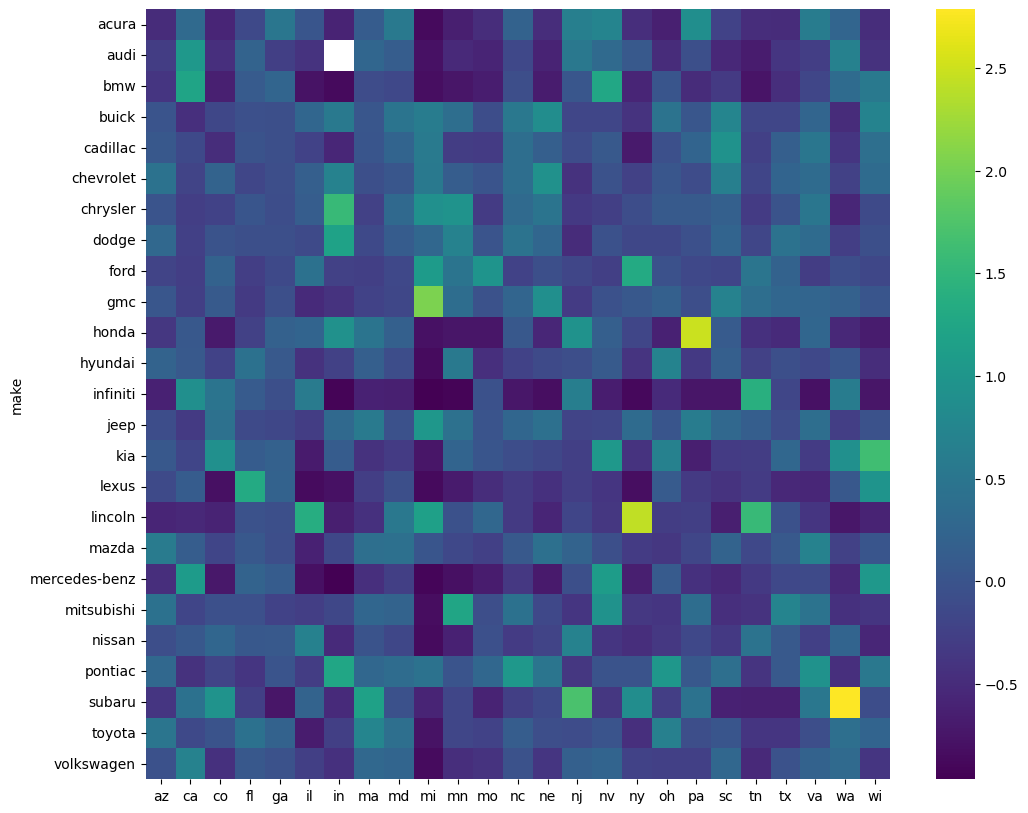

In [77]:
# Plots the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(marketsharedf, cmap='viridis')

In [94]:
car_df.groupby('state')[['sellingprice', 'condition']].mean().head()

,sellingprice,condition
state,,
al,9440.000000,2.832000
az,11702.606036,3.123858
ca,13327.414686,3.368029
co,14884.746363,3.546982
fl,13447.851704,3.462778


C:\Users\esteb\AppData\Local\Temp\ipykernel_42388\1910077319.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



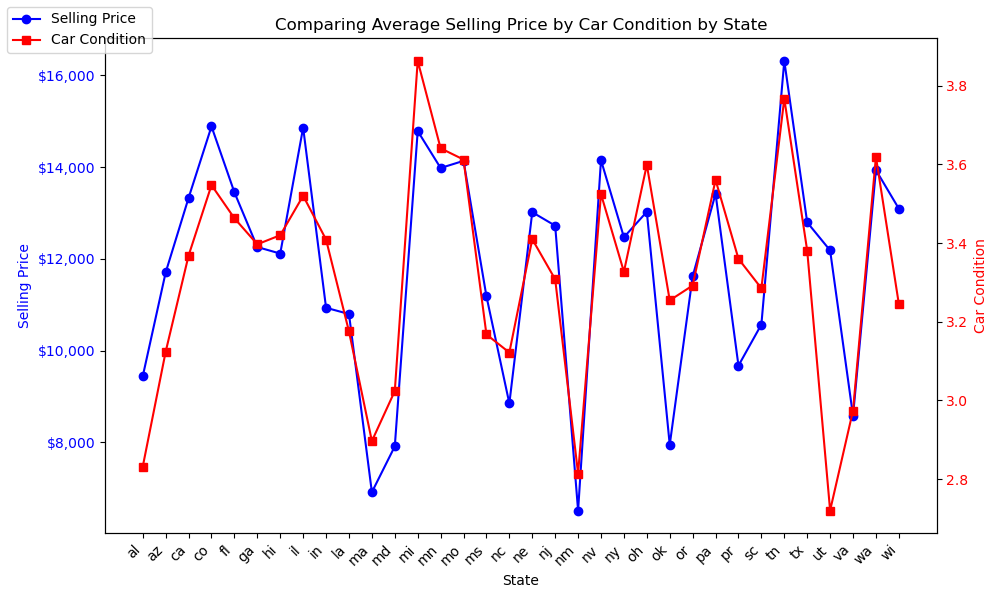

In [93]:
# Calculate averages by state
averages = car_df.groupby('state')[['sellingprice', 'condition']].mean()

# Plotting dual y-axis line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for column1 on primary y-axis
ax1.plot(averages.index, averages['sellingprice'], color='b', marker='o', label='Selling Price')
ax1.set_xlabel('State')
ax1.set_ylabel('Selling Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(averages.index, rotation=45, ha='right')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot for column2 on secondary y-axis
ax2.plot(averages.index, averages['condition'], color='r', marker='s', label='Car Condition')
ax2.set_ylabel('Car Condition', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Format y-axis labels for ax1 with dollar sign
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax1.yaxis.set_major_formatter(formatter)

# Title and legend
plt.title('Comparing Average Selling Price by Car Condition by State')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\esteb\AppData\Local\Temp\ipykernel_42388\1178097547.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



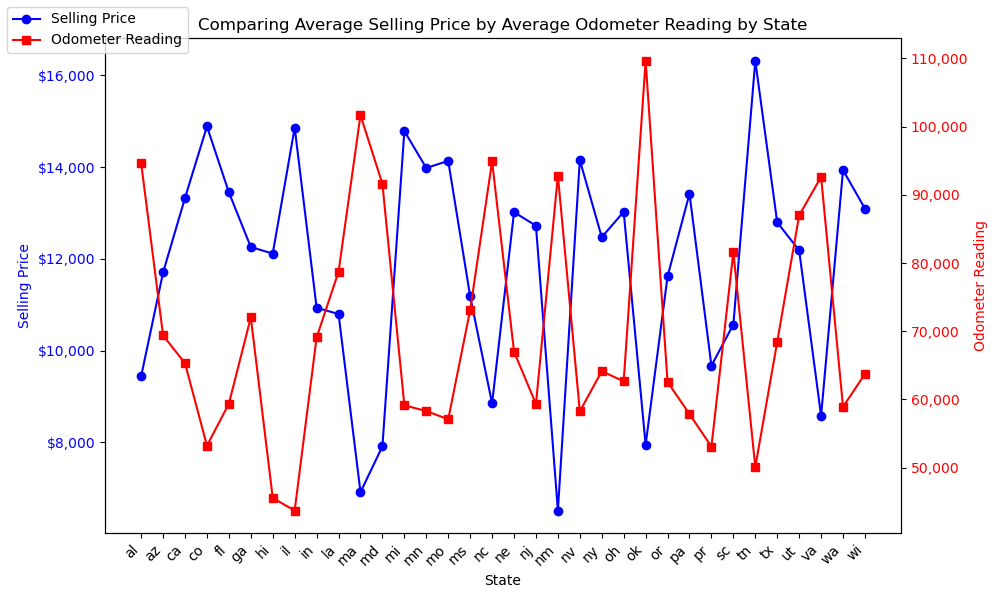

In [97]:
# Calculate averages by state
averages = car_df.groupby('state')[['sellingprice', 'odometer']].mean()

# Plotting dual y-axis line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for column1 on primary y-axis
ax1.plot(averages.index, averages['sellingprice'], color='b', marker='o', label='Selling Price')
ax1.set_xlabel('State')
ax1.set_ylabel('Selling Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(averages.index, rotation=45, ha='right')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot for column2 on secondary y-axis
ax2.plot(averages.index, averages['odometer'], color='r', marker='s', label='Odometer Reading')
ax2.set_ylabel('Odometer Reading', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Format y-axis labels for ax1 with dollar sign
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax1.yaxis.set_major_formatter(formatter)

# Format y-axis labels for ax2 with thousands separator
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
ax2.yaxis.set_major_formatter(formatter)

# Title and legend
plt.title('Comparing Average Selling Price by Average Odometer Reading by State')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()